In [11]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
parkinsons_dataset = pd.read_csv("parkinsons_dataset.csv")

In [13]:
parkinsons_dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
parkinsons_dataset.shape

(195, 24)

In [15]:
parkinsons_dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [16]:
X = parkinsons_dataset.drop(columns=['status','name'],axis=1)
Y = parkinsons_dataset['status']
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,x_train.shape,x_test.shape)

(195, 22) (156, 22) (39, 22)


In [17]:
ensemble = VotingClassifier(estimators=[
    ('gnb', GaussianNB()),
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
], voting='hard') 

classifier = ensemble.fit(x_train,y_train)

In [18]:
#calculate training and test accuracy
x_train_prediction = classifier.predict(x_train)
training_score = accuracy_score(x_train_prediction,y_train)
print("Training accuracy: ",training_score)

x_test_prediction = classifier.predict(x_test)
testing_score = accuracy_score(x_test_prediction,y_test)
print("Testing accuracy: ",testing_score)

Training accuracy:  0.9615384615384616
Testing accuracy:  0.7692307692307693


In [19]:
print(classification_report(x_test_prediction,y_test))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.76      0.92      0.83        24

    accuracy                           0.77        39
   macro avg       0.78      0.72      0.74        39
weighted avg       0.77      0.77      0.76        39



<Axes: >

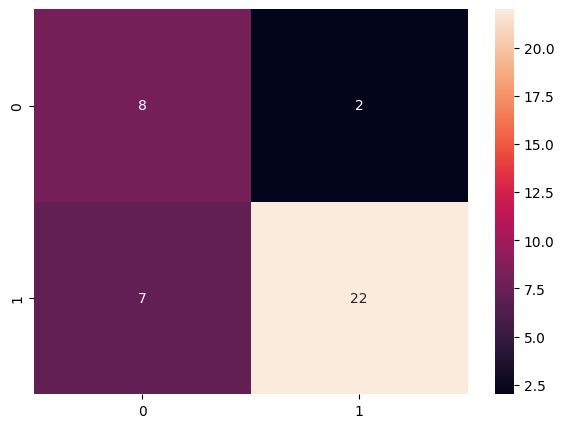

In [20]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(7,5))
plt.xlabel('Predicted')
plt.ylabel('Actual')
cmat = confusion_matrix(y_test,x_test_prediction)
sb.heatmap(cmat,annot=True)

In [21]:
import pickle
pickle.dump(classifier,open('parkinsons_detection_model.pkl','wb'))